# Metode KNN dan Random Forest

### Data Content

In [1]:
## Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
## Load data
df = pd.read_csv('data_knn.csv')

## displaying first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis (EDA) and Visualization

In [3]:
## shape of the dataframe
df.shape

(569, 33)

In [4]:
## concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

tipe data sudah sesuai namun terdapat salah satu kolom yang tidak memiliki nilai

In [5]:
## checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The whole column 'Unamed: 32' has NaN values.

In [6]:
## dropping 'Unnamed: 32' column.
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)

In [7]:
## Analisis deskripsi
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualizations

#### Outlier Detection

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# Calculate mean values for each column
column_means = df.mean()


# Select columns with mean values between 1 and 100
selected_columns1 = column_means[(column_means < 1)].index

# Create a new DataFrame with selected columns
new_df1 = df[selected_columns1]



# Select columns with mean values between 1 and 100
selected_columns2 = column_means[(column_means > 1) & (column_means < 50)].index

# Create a new DataFrame with selected columns
new_df2 = df[selected_columns2]



# Select columns with mean values between 1 and 100
selected_columns3 = column_means[(column_means > 50)].index

# Create a new DataFrame with selected columns
new_df3 = df[selected_columns3]

C:\Users\joni\AppData\Local\Temp\ipykernel_12064\140220306.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df.mean()


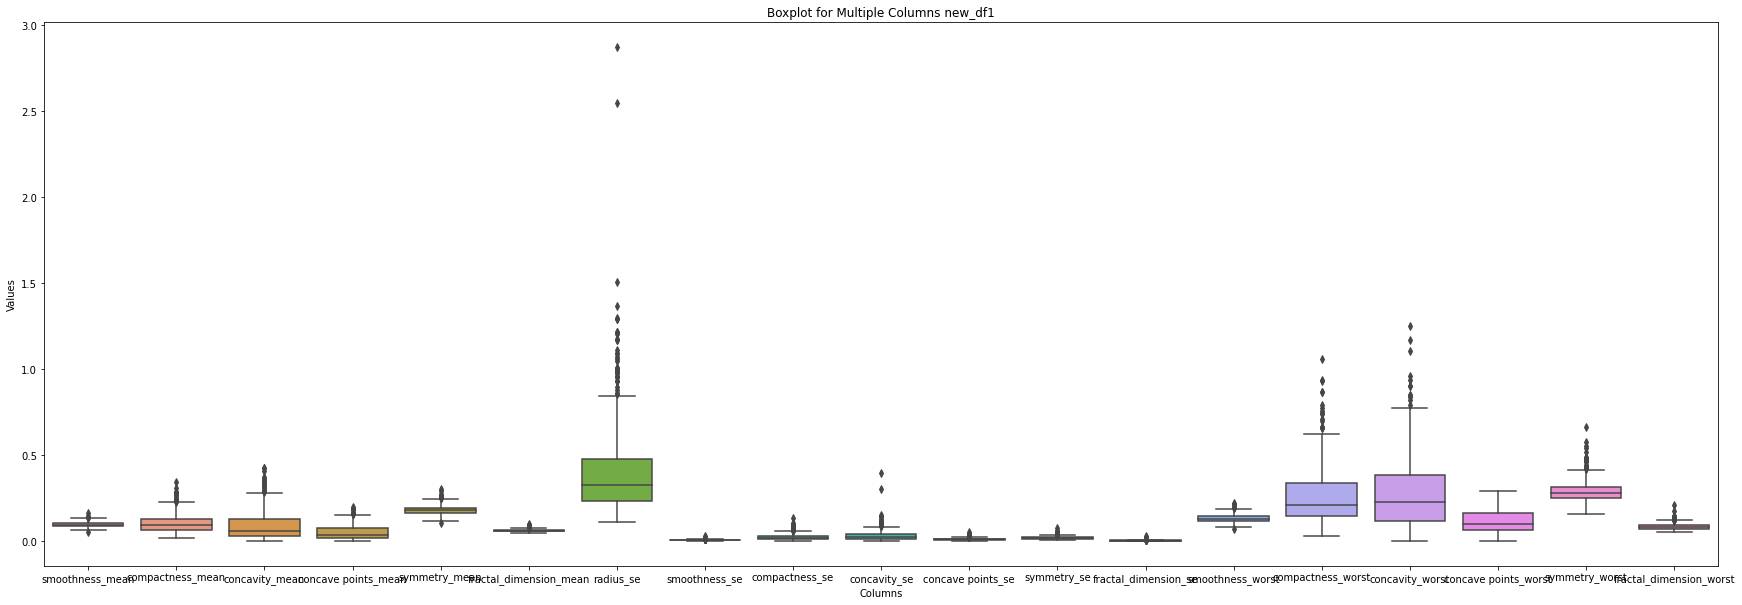

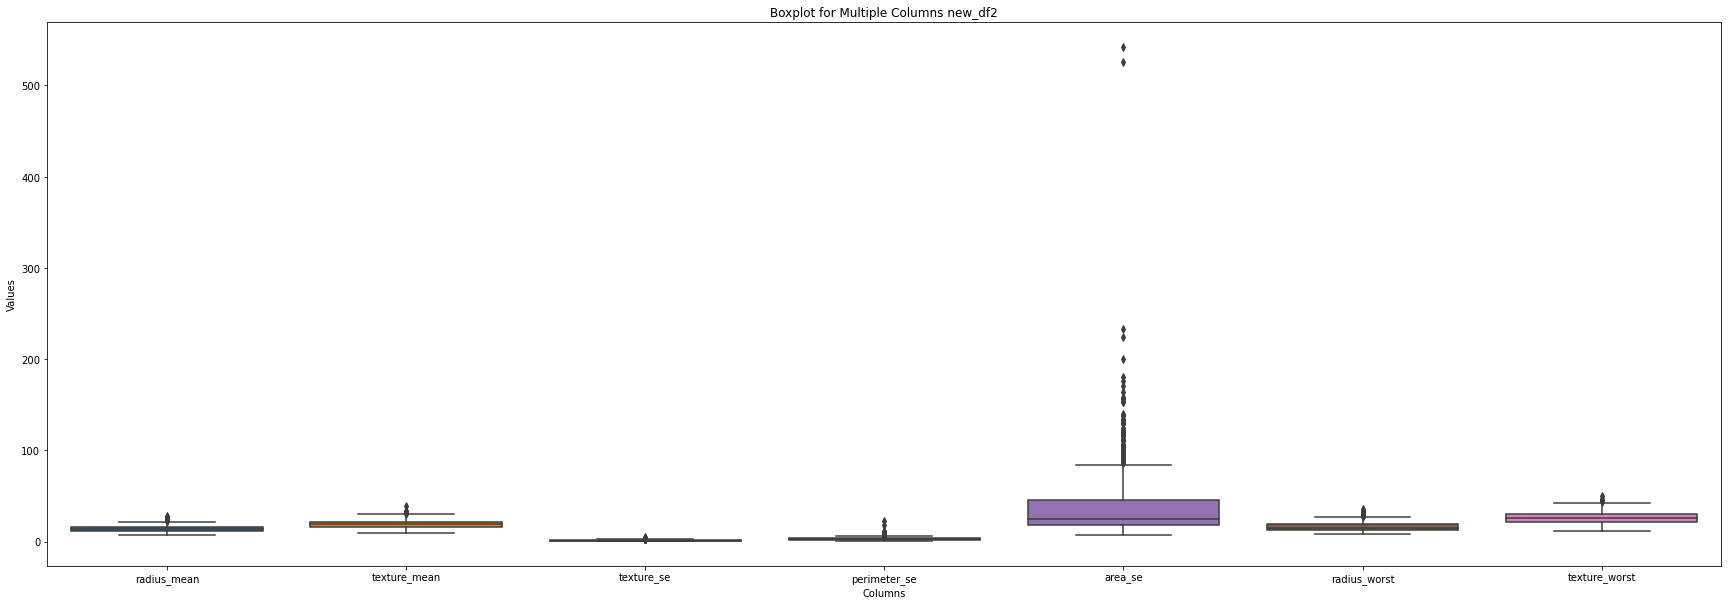

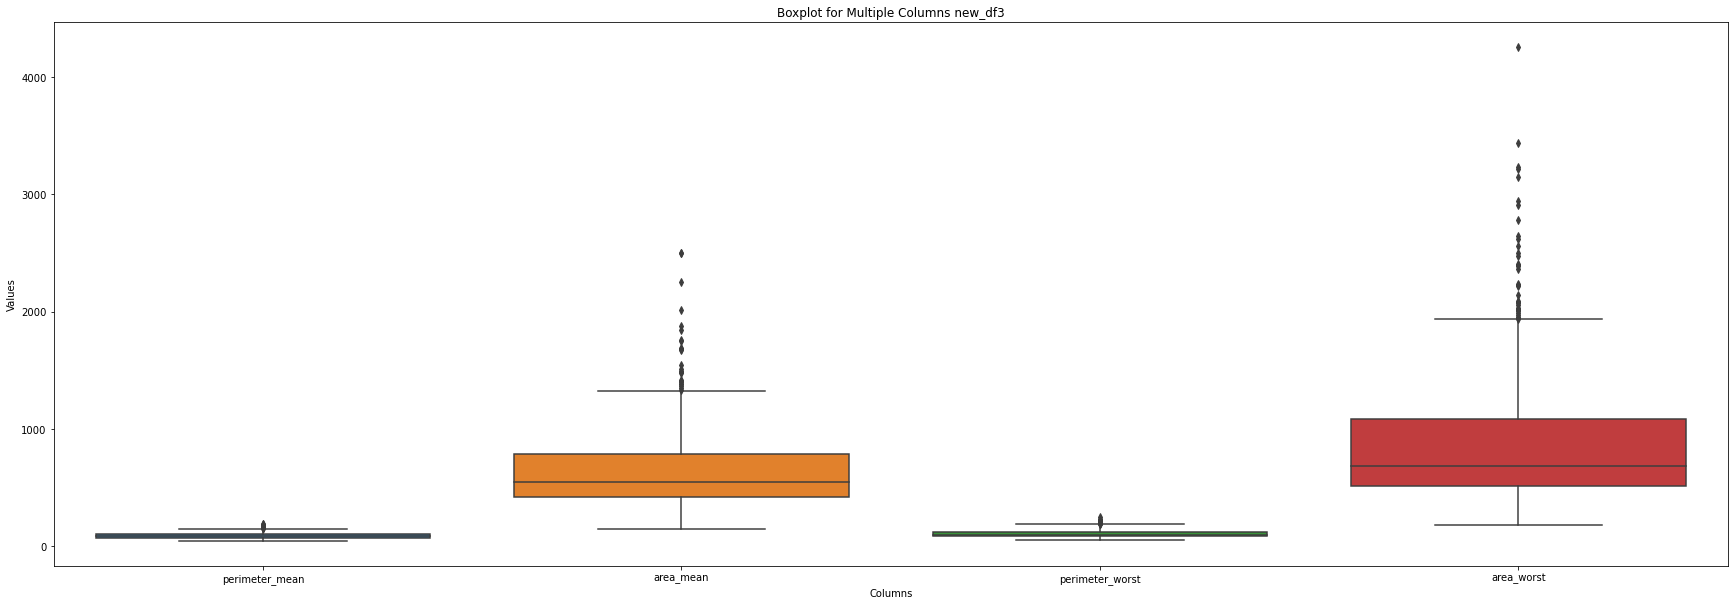

In [10]:
# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df1)
plt.title('Boxplot for Multiple Columns new_df1')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df2)
plt.title('Boxplot for Multiple Columns new_df2')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df3)
plt.title('Boxplot for Multiple Columns new_df3')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [11]:
from scipy import stats

# Sample DataFrame (replace this with your actual DataFrame)
# df = ...

# Specify the columns to be used for outlier detection
columns_yang_diambil = df.drop('diagnosis', axis=1)

# Method 1: Z-Score Method
z_scores = stats.zscore(columns_yang_diambil)
threshold = 5 
outliers_zscore = np.abs(z_scores) > threshold

# Method 2: Interquartile Range (IQR) Method
outliers_iqr = pd.DataFrame()
for col in columns_yang_diambil.columns:
    q1 = columns_yang_diambil[col].quantile(0.25)
    q3 = columns_yang_diambil[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr
    outliers_iqr[col] = ((columns_yang_diambil[col] < lower_bound) | (columns_yang_diambil[col] > upper_bound))

# Combine both methods
outliers_combined = np.logical_or(outliers_zscore, outliers_iqr).any(axis=1)

# Filter the DataFrame to remove rows containing outliers
df = df[~outliers_combined]

# Display the filtered DataFrame
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
# Calculate mean values for each column
column_means = df.mean()


# Select columns with mean values between 1 and 100
selected_columns1 = column_means[(column_means < 1)].index

# Create a new DataFrame with selected columns
new_df1 = df[selected_columns1]



# Select columns with mean values between 1 and 100
selected_columns2 = column_means[(column_means > 1) & (column_means < 50)].index

# Create a new DataFrame with selected columns
new_df2 = df[selected_columns2]



# Select columns with mean values between 1 and 100
selected_columns3 = column_means[(column_means > 50)].index

# Create a new DataFrame with selected columns
new_df3 = df[selected_columns3]

C:\Users\joni\AppData\Local\Temp\ipykernel_12064\140220306.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df.mean()


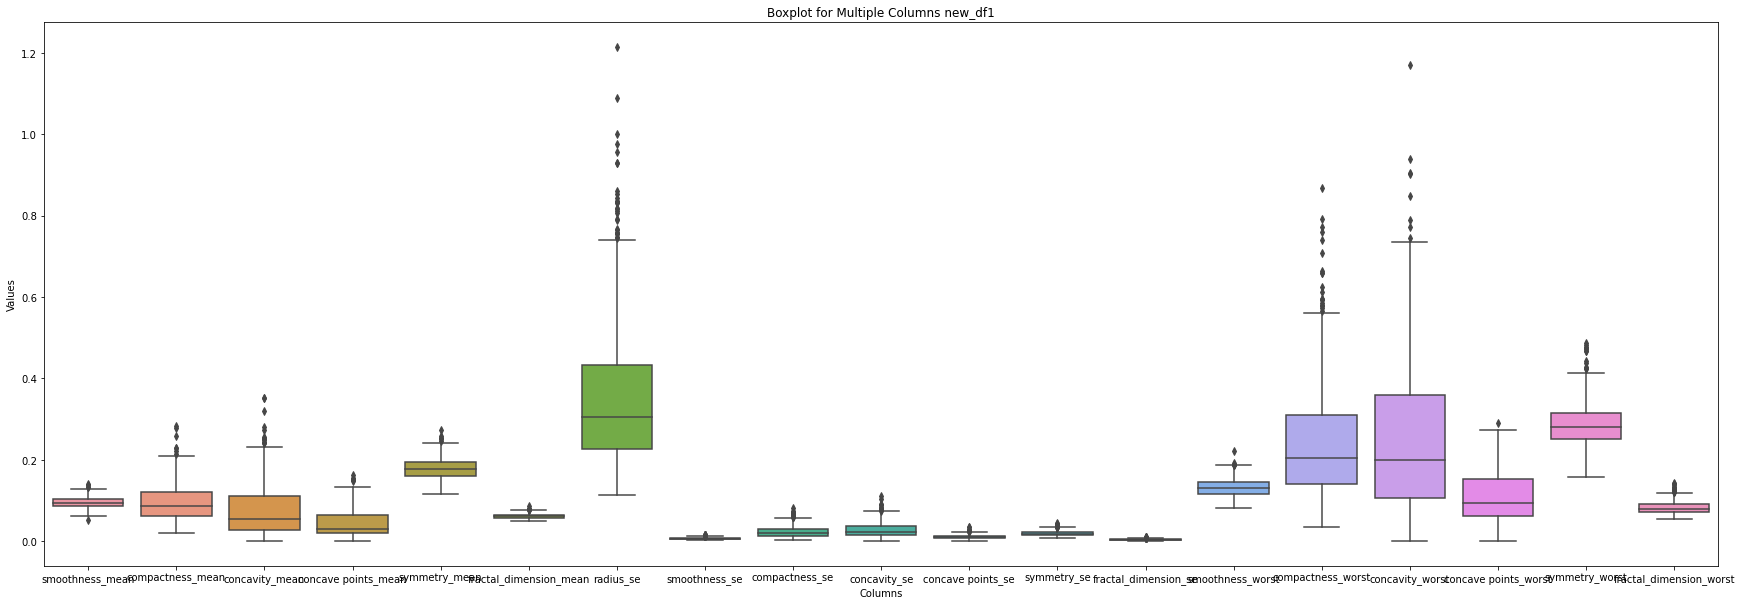

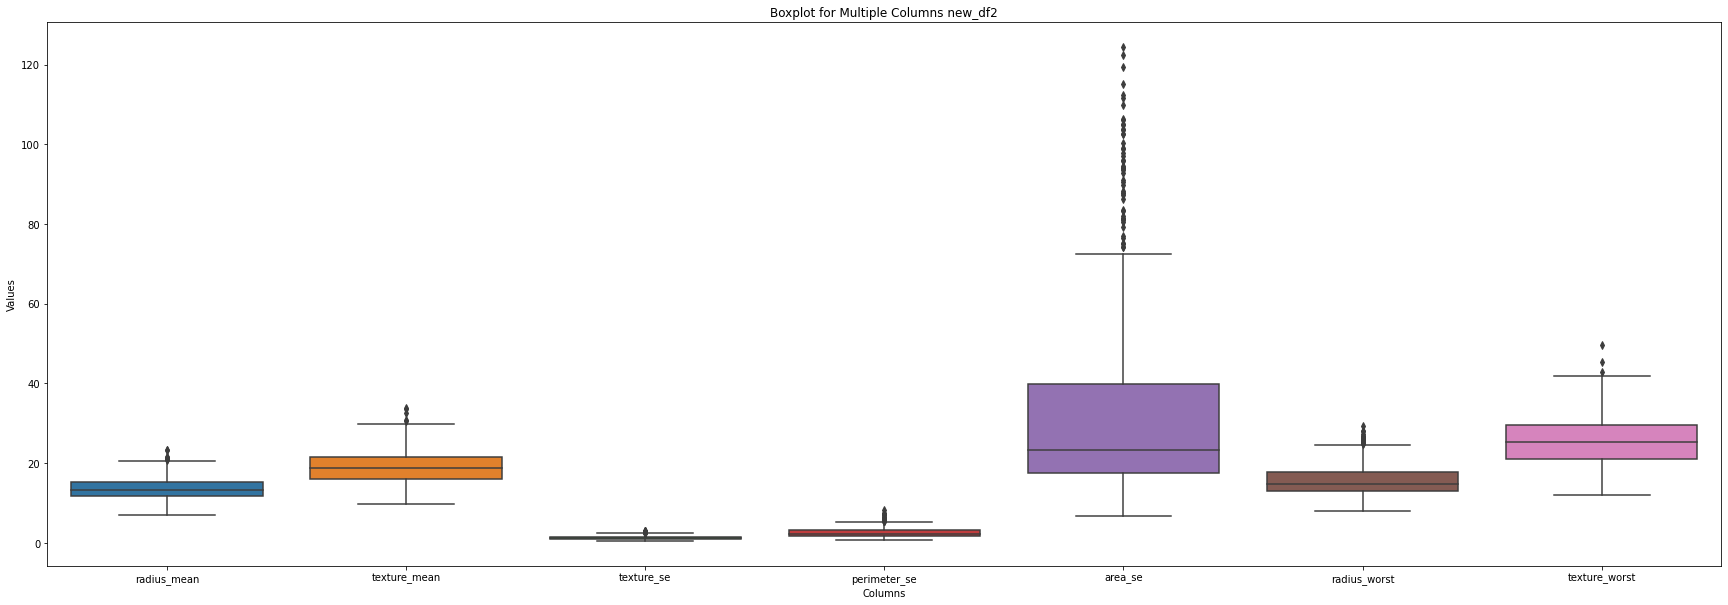

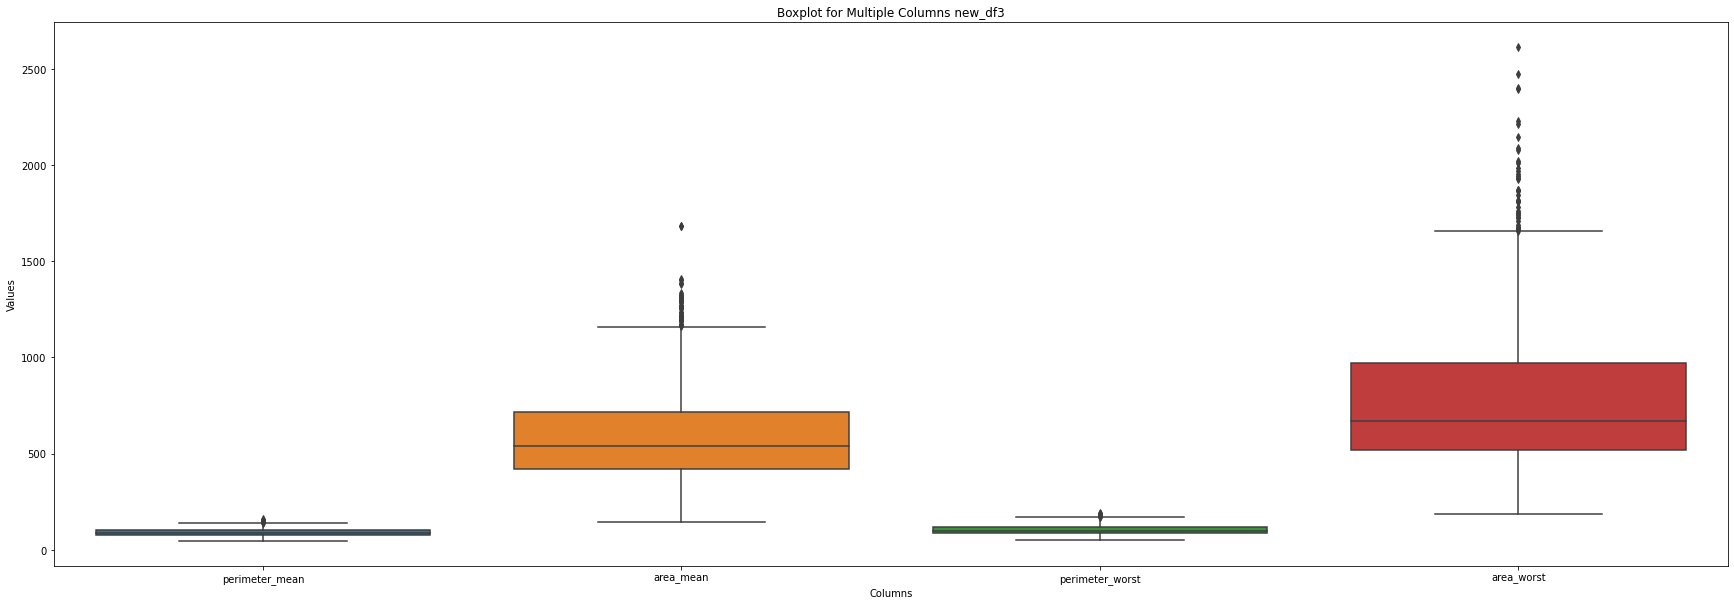

In [16]:
# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df1)
plt.title('Boxplot for Multiple Columns new_df1')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df2)
plt.title('Boxplot for Multiple Columns new_df2')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Create boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=new_df3)
plt.title('Boxplot for Multiple Columns new_df3')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

#### Correlation

<AxesSubplot:>

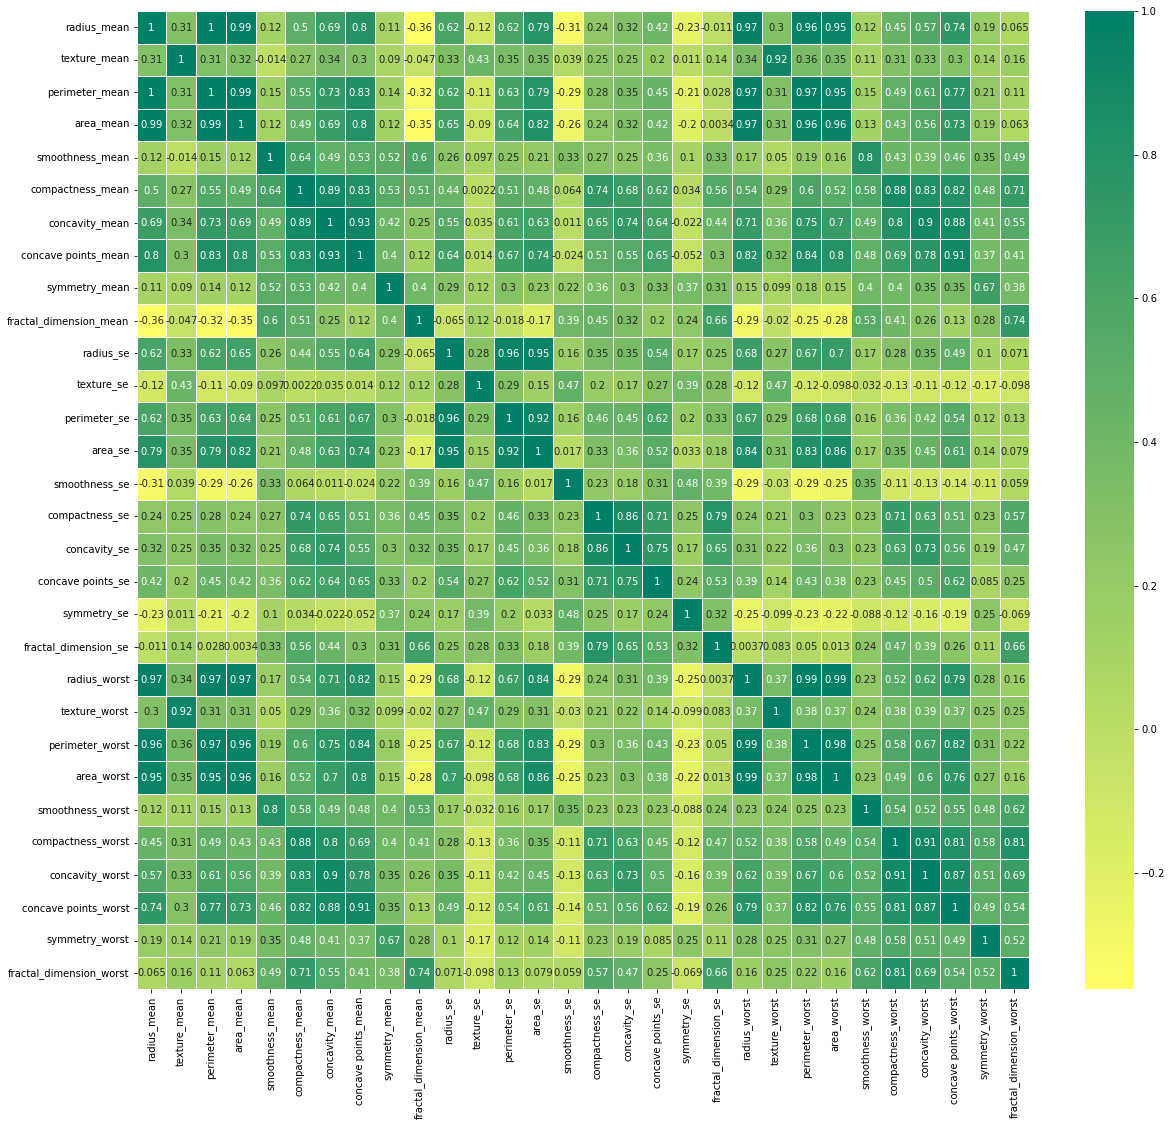

In [19]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="summer_r")

From the heatmap, we can observe from the heatmaps that there are many negative correlations in this dataset.

In [20]:
corr = df.corr()

# Ambang batas korelasi yang diinginkan
threshold = 0.85

# Identifikasi kolom-kolom yang memiliki korelasi di atas ambang batas
high_corr_columns = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr_columns.append((corr.columns[j], colname, corr.iloc[i, j]))

# Display the selected correlations
print("Correlation values for columns with correlation above 85%:")
for corr_pair in high_corr_columns:
    print(f"{corr_pair[0]} - {corr_pair[1]}: {corr_pair[2]}")

Correlation values for columns with correlation above 85%:
radius_mean - perimeter_mean: 0.9980103676779399
radius_mean - area_mean: 0.991964762342591
perimeter_mean - area_mean: 0.9901708257219327
compactness_mean - concavity_mean: 0.8855348153491961
concavity_mean - concave points_mean: 0.9294568295136608
radius_se - perimeter_se: 0.9606646510633549
radius_se - area_se: 0.949141736796235
perimeter_se - area_se: 0.9172229822101038
compactness_se - concavity_se: 0.8635679842130469
radius_mean - radius_worst: 0.9684908736711859
perimeter_mean - radius_worst: 0.9694498799384987
area_mean - radius_worst: 0.9677413749913456
texture_mean - texture_worst: 0.9166662429273778
radius_mean - perimeter_worst: 0.963659519959964
perimeter_mean - perimeter_worst: 0.9696857957650978
area_mean - perimeter_worst: 0.9619739599885728
radius_worst - perimeter_worst: 0.9931917593230345
radius_mean - area_worst: 0.9461268733669163
perimeter_mean - area_worst: 0.9468883210201438
area_mean - area_worst: 0.960

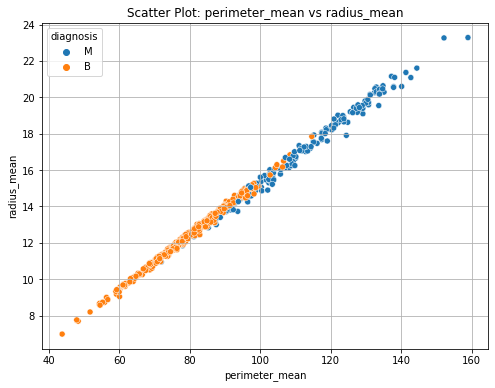

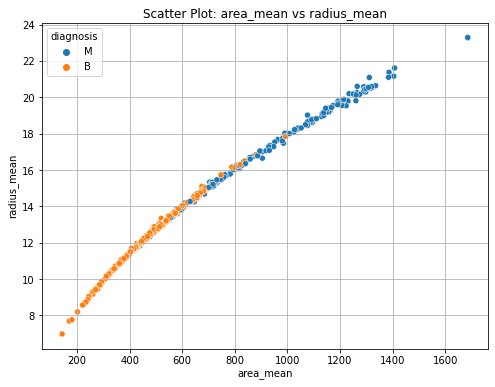

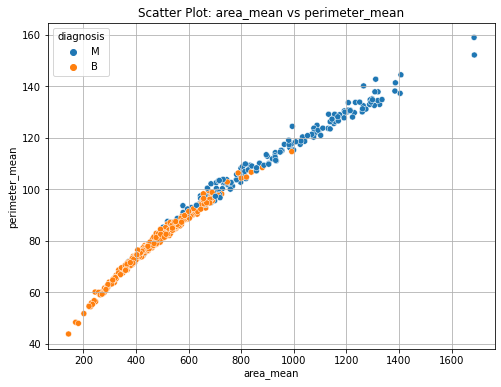

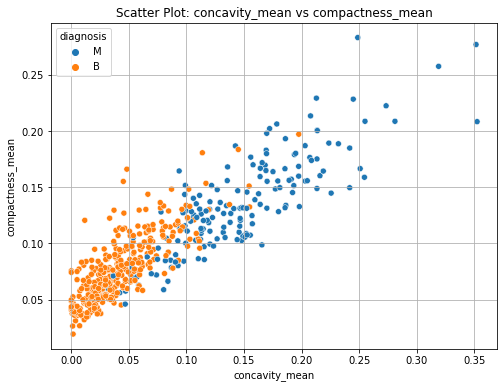

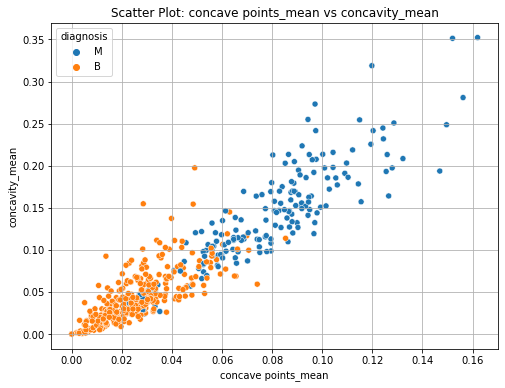

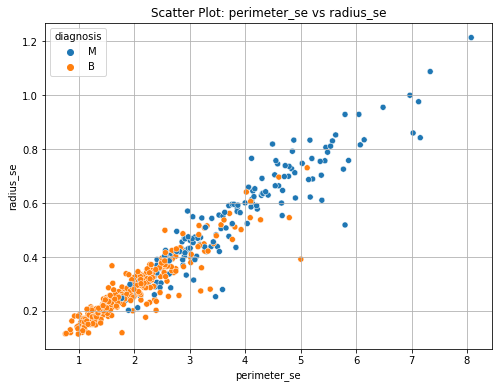

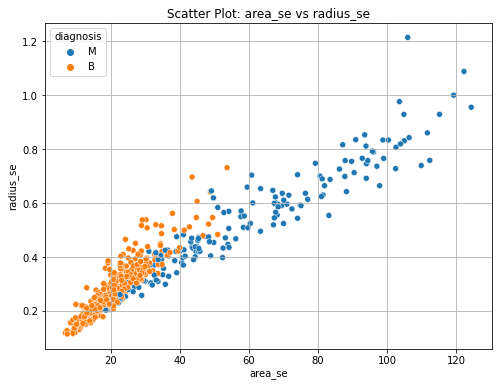

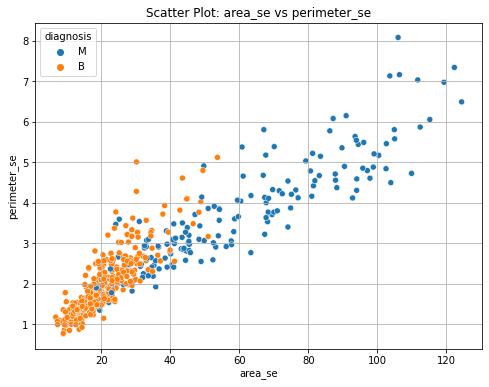

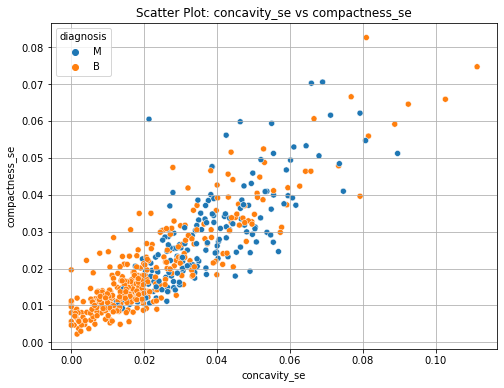

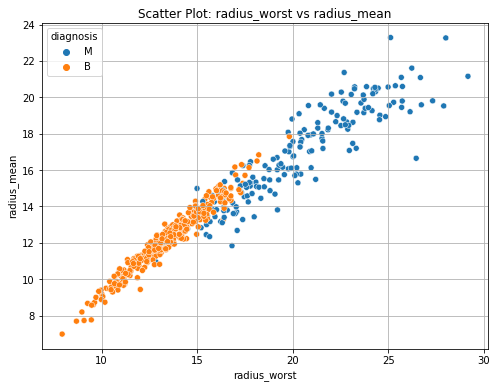

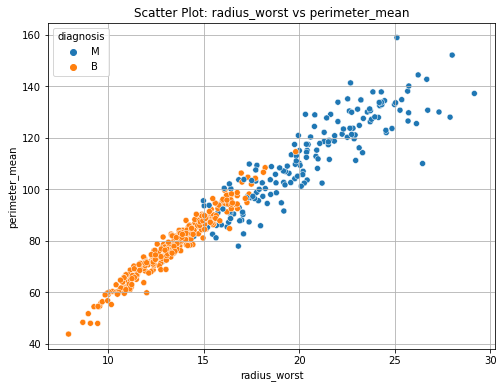

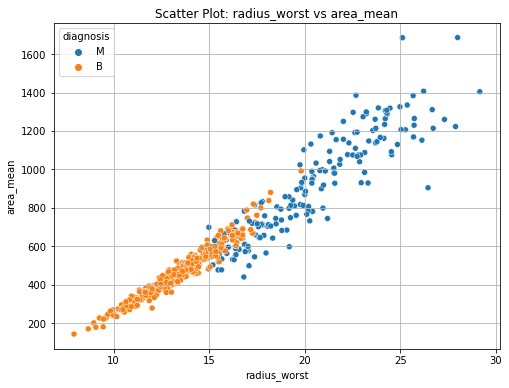

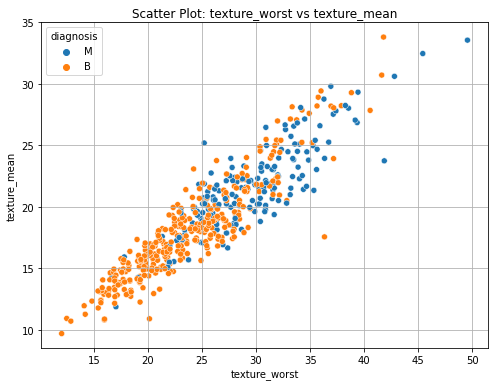

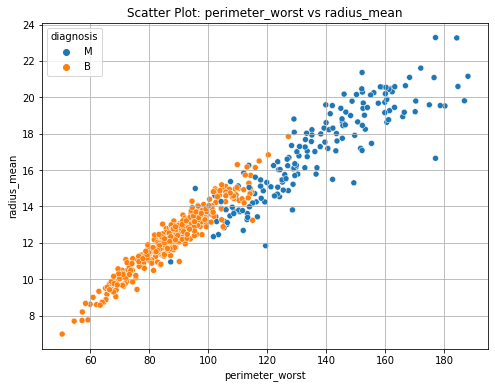

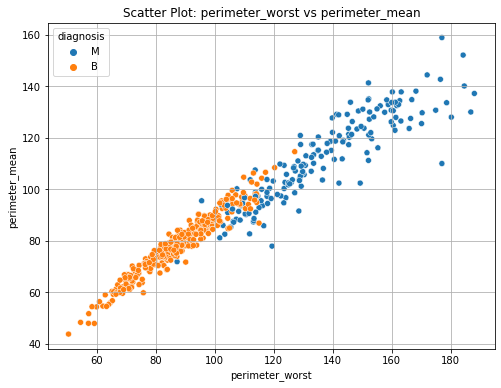

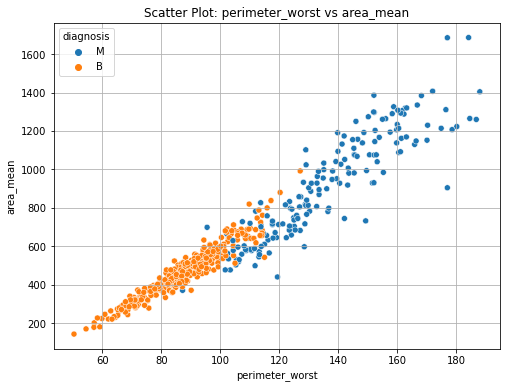

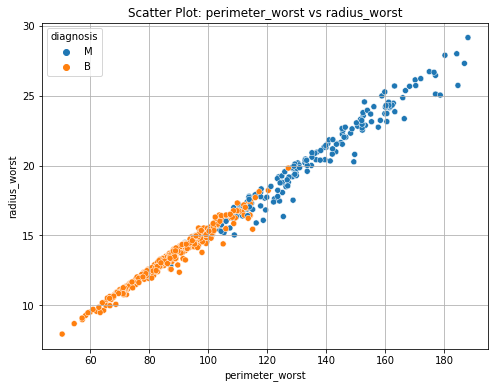

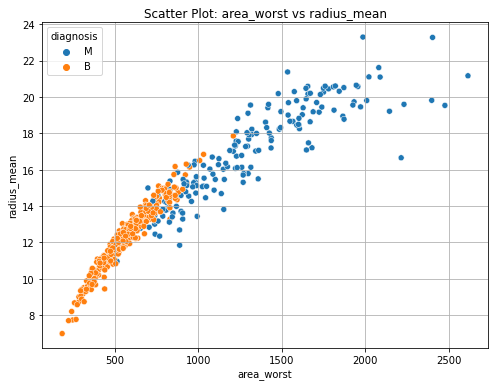

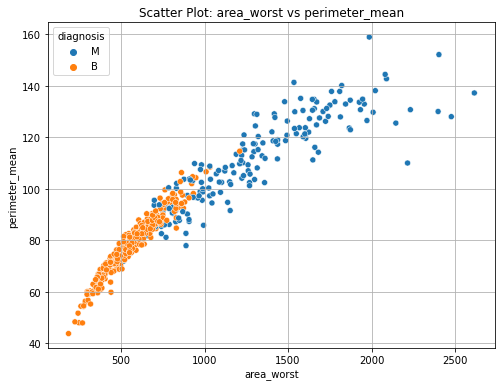

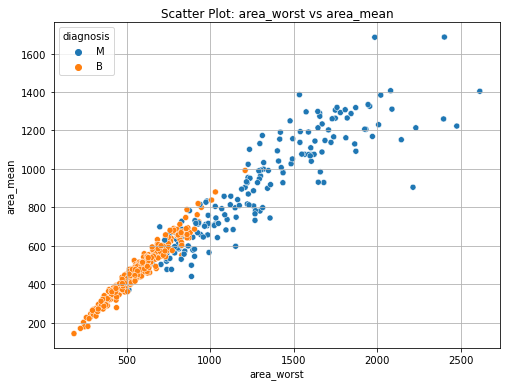

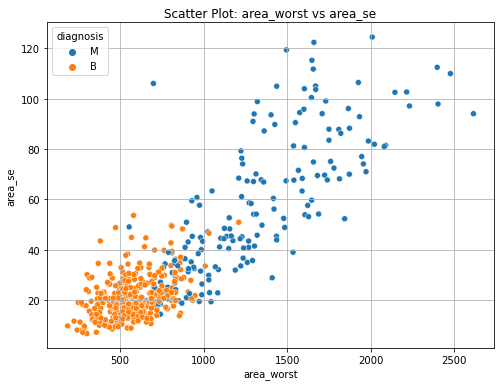

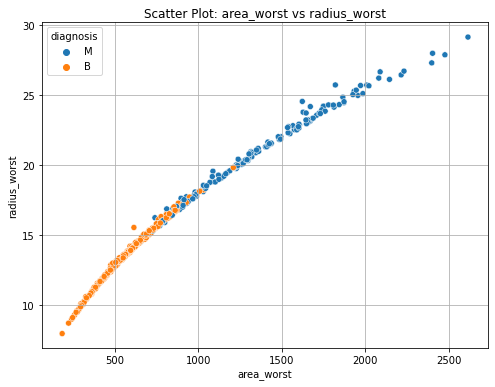

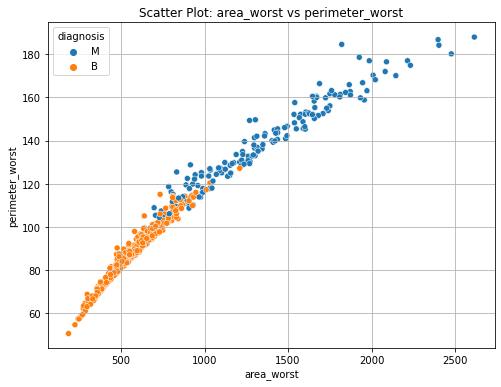

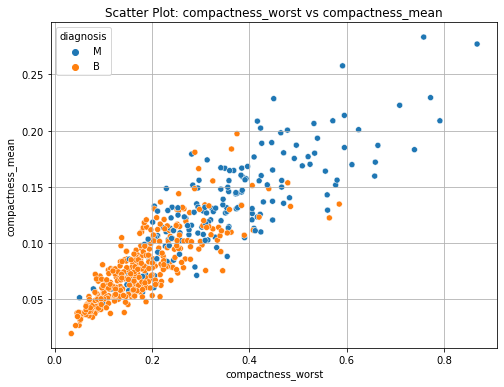

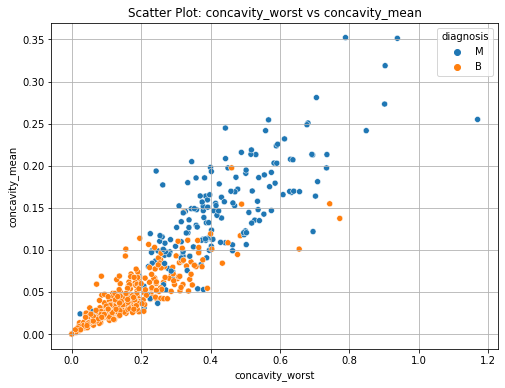

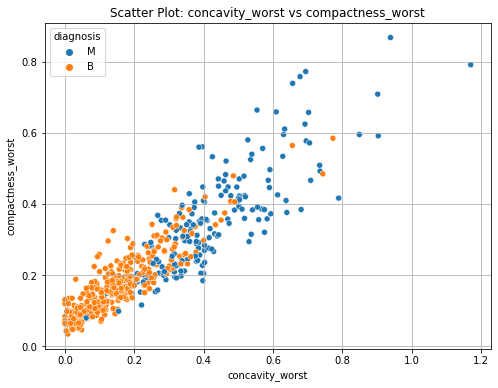

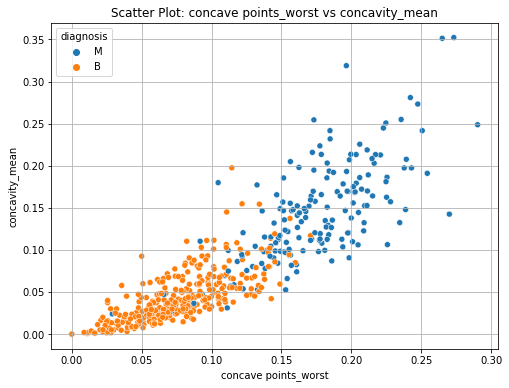

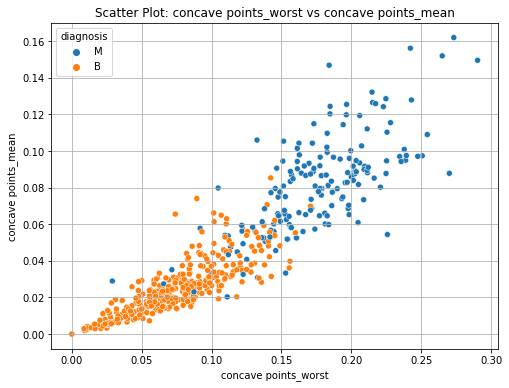

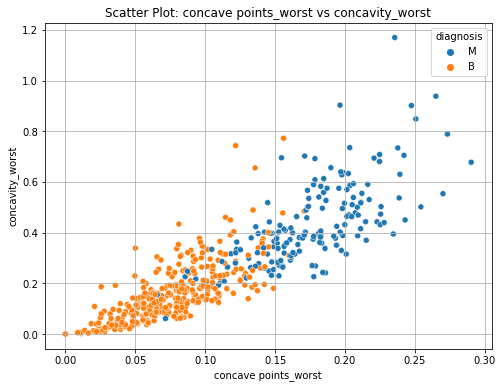

In [21]:
# Identifikasi kolom-kolom yang memiliki korelasi di atas ambang batas
high_corr_columns = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            high_corr_columns.append((colname1, colname2))

# Buat scatter plot untuk setiap pasangan kolom yang memiliki korelasi tinggi
for colname1, colname2 in high_corr_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=colname1, y=colname2, hue='diagnosis', data=df)
    plt.title(f"Scatter Plot: {colname1} vs {colname2}")
    plt.xlabel(colname1)
    plt.ylabel(colname2)
    plt.grid(True)
    plt.show()

### Data Preprocessing and Building Models

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

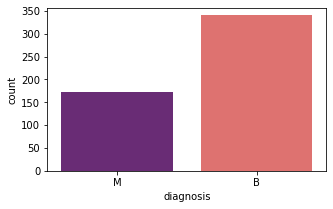

In [22]:
# countplot
plt.figure(figsize = (5,3))
sns.countplot(x="diagnosis", data=df, palette='magma')

In [23]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

B    340
M    173
Name: diagnosis, dtype: int64

In [24]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [25]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [26]:
df['diagnosis'].value_counts()

0    340
1    173
Name: diagnosis, dtype: int64

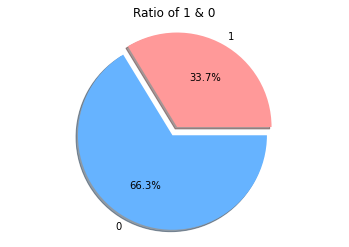

In [27]:
labels = 1, 0
sizes = [df['diagnosis'].value_counts()[1], df['diagnosis'].value_counts()[0]]
explode = (0.1, 0)

## coloring
colors = ['#ff9999', '#66b3ff']

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Ratio of 1 & 0")

plt.show()

#### Splitting the data into train and test 80:20

In [124]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=62)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (410, 30)
Shape of test set: (103, 30)


In [125]:
y_test.value_counts()

0    73
1    30
Name: diagnosis, dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.(Unit variance means dividing all the values by the standard deviation.)

### Classification Models K Nearest Neighbours

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [128]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

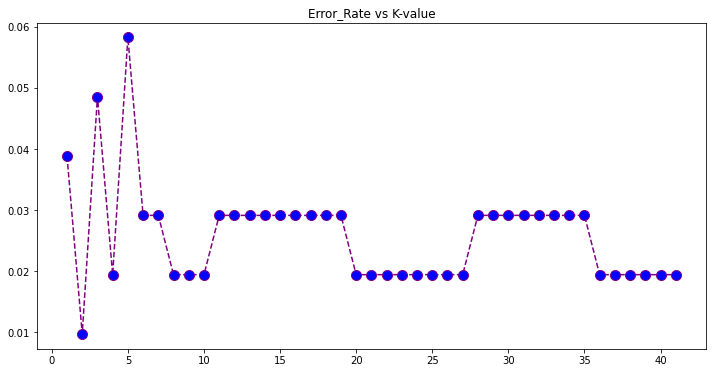

In [129]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

From this graph, K value of 5,6,10, and 11 seem to show the lowest mean error. So using one of these values

In [130]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [131]:
0.9902912621359223

0.9902912621359223

Accuracy: 0.9902912621359223

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.97      0.98        30

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103


Confusion Matrix:
[[73  0]
 [ 1 29]]
True Positives: 29
True Negatives: 73


<AxesSubplot:>

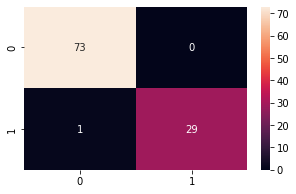

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Extract True Positives and True Negatives
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
print("True Positives:", TP)
print("True Negatives:", TN)

## Matrix
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".0f", ax=ax)